In [ ]:
import numpy as np
import cv2
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size':16})

In [ ]:
housing=fetch_california_housing()

In [ ]:
dir(housing)#housing.target,DESCR,housing.feature

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
housing.data.shape

(20640, 8)

In [ ]:
housing.target.shape

(20640,)

In [ ]:
ridgereg=linear_model.Ridge()

In [ ]:
# Split the California housing dataset into training and testing sets.
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    housing.data, housing.target, test_size=0.3, random_state=42)


In [ ]:
ridgereg.fit(X_train,y_train)

Ridge()

In [ ]:
metrics.mean_squared_error(y_train,ridgereg.predict(X_train))

0.5233577422311327

In [ ]:
ridgereg.score(X_train,y_train)

0.6093458881478931

In [ ]:
y_pred=ridgereg.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.5305052690933699

Text(0, 0.5, 'target value')

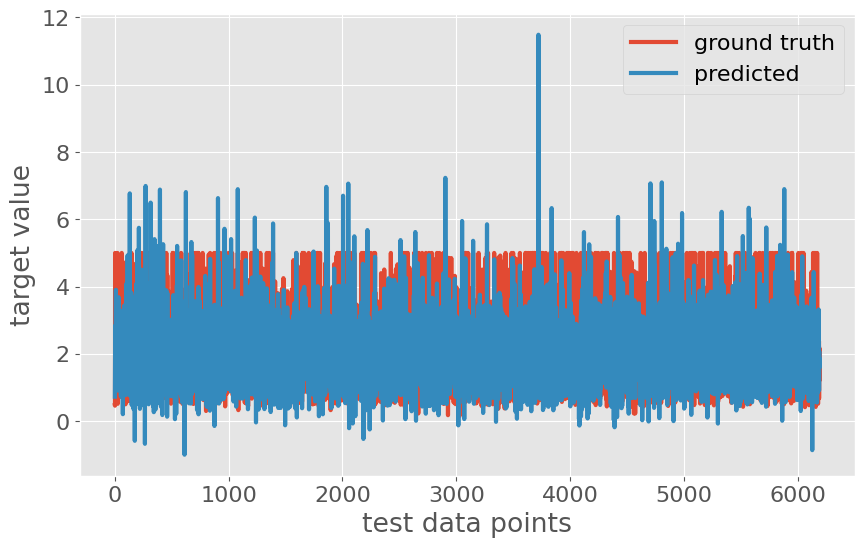

In [ ]:
# Create a plot to compare ground truth and predicted values.
plt.figure(figsize=(10, 6))

# Plot ground truth and predicted values with labels and line widths.
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')

# Add a legend, xlabel, and ylabel for visualization.
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')


Text(-5, 45, 'MSE=0.531')

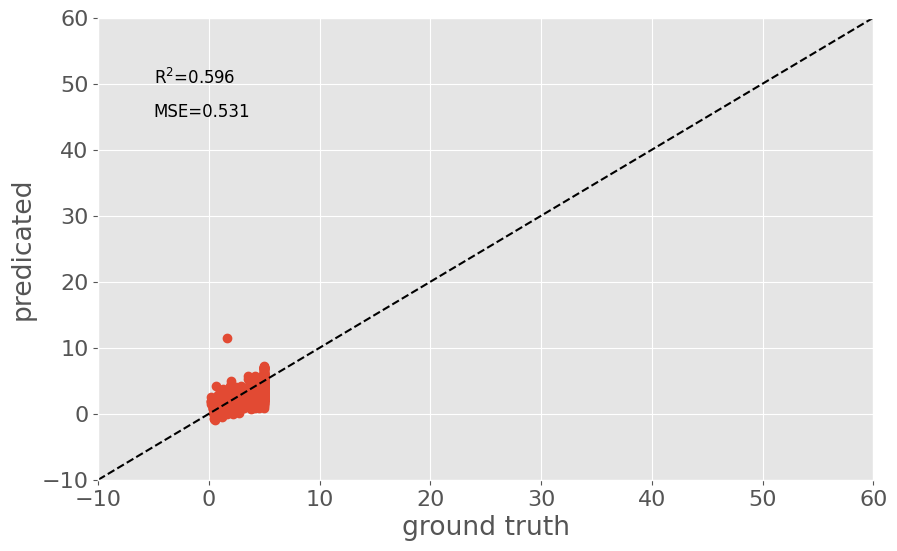

In [ ]:
# Create a plot to compare ground truth and predicted values.
plt.figure(figsize=(10,6))

# Plot ground truth and predicted values with labels and line widths.
plt.plot(y_test,y_pred,'o')
plt.plot([-10,60],[-10,60],'k--')
plt.axis([-10,60,-10,60])
plt.xlabel('ground truth')
plt.ylabel('predicated')

# Add a legend, xlabel, and ylabel for visualization.
scorestr=r'R$^2$=%.3f' %ridgereg.score(X_test,y_test)
errstr='MSE=%.3f' %metrics.mean_squared_error(y_test,y_pred)
plt.text(-5,50,scorestr,fontsize=12)
plt.text(-5,45,errstr,fontsize=12)